In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from  data_tools.curve_fitting import shear_func_inf_obj, WLF_obj
from sklearn.metrics import mean_squared_error as mse
import joblib
from scipy.stats import entropy
from scipy.spatial.distance import jensenshannon
#from data_tools.curve_fitting import *

In [40]:
def divergence(arr1, arr2):
    return entropy(np.array(arr2)+ 1e-15, np.array(arr1)+ 1e-15)

In [3]:
date = '2022-09-14'
data_type = 'full_aug_mod'
version = ''
path = f'../../../data/ayush/Melt_Viscosity_Predictor/Extrapolation_Tests/{date}_{data_type}{version}/'

In [4]:
alt_path = f'../../../data/ayush/Melt_Viscosity_Predictor/Extrapolation_Tests/0307/'
mw_const = pd.read_pickle(alt_path + 'Mw_const.pickle')
shear_const = pd.read_pickle(alt_path + 'shear_const.pickle')
WLF_const = pd.read_pickle(alt_path + 'WLF_const.pickle')


In [5]:
shear_predicted_constants_gpr = shear_const['GPR']
shear_predicted_constants_ann = shear_const['ANN']
shear_predicted_constants_HypNet = shear_const['PIM']
shear_data = pd.read_pickle('./Data/shear_const_data.pickle')


In [6]:
predicted_constants_gpr = mw_const['GPR']
predicted_constants_ann = mw_const['ANN']
predicted_constants_HypNet =  mw_const['PIM']
Mw_data = pd.read_pickle('./Data/Mw_const_data.pickle')

In [7]:
wlf_constants_gpr = WLF_const['GPR']
wlf_constants_ann = WLF_const['ANN']
wlf_constants_HypNet = WLF_const['PIM']
temp_data = pd.read_pickle('Data/temp_const_data.pickle')

In [8]:
wlf_constants_HypNet = wlf_constants_HypNet[wlf_constants_HypNet['r'] ==20]
#print(wlf_constants_HypNet.loc[wlf_constants_HypNet['r'] == 10, 'r2_fit'].mean())
#print(wlf_constants_HypNet.loc[wlf_constants_HypNet['r'] == 5, 'r2_fit'].mean())

# COMBINED PHENOMONOLOGICAL CONSTANT DISTRIBUTIONS

[0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625
 0.00390625 0.00390625 0.00390625 0.00390625 0.00390625 0.0039

/tmp/ipykernel_215496/1393180251.py:178: RuntimeWarning: invalid value encountered in log10
  y,_,ps =ax[ann_pos,5].hist(np.log10((np.array(shear_predicted_constants_ann['S_cr'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'ANN', color = colors['ANN'], density = True)
/tmp/ipykernel_215496/1393180251.py:183: RuntimeWarning: invalid value encountered in log10
  y,_,ps = ax[gpr_pos,5].hist(np.log10((np.array(shear_predicted_constants_gpr['S_cr'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'GPR', color = colors['GPR'], density = True)


gpr div [0.06666666666666668, 0.06666666666666668, 0.06666666666666668, 0.20000000000000004, 0.4666666666666668, 0.0, 0.0, 0.06666666666666668, 0.06666666666666668] [0.676133955065706, 0.14285714285714288, 0.03645612547689699, 0.018228062738448497, 0.030521407376006785, 0.02797795676133956, 0.019075879610004242, 0.022043238660449348, 0.026706231454005937]
penn div [0.06666666666666668, 0.06666666666666668, 0.06666666666666668, 0.20000000000000004, 0.4666666666666668, 0.0, 0.0, 0.06666666666666668, 0.06666666666666668] [0.05612244897959184, 0.1173469387755102, 0.1568877551020408, 0.20280612244897958, 0.19642857142857142, 0.1434948979591837, 0.0586734693877551, 0.042091836734693876, 0.026147959183673467]


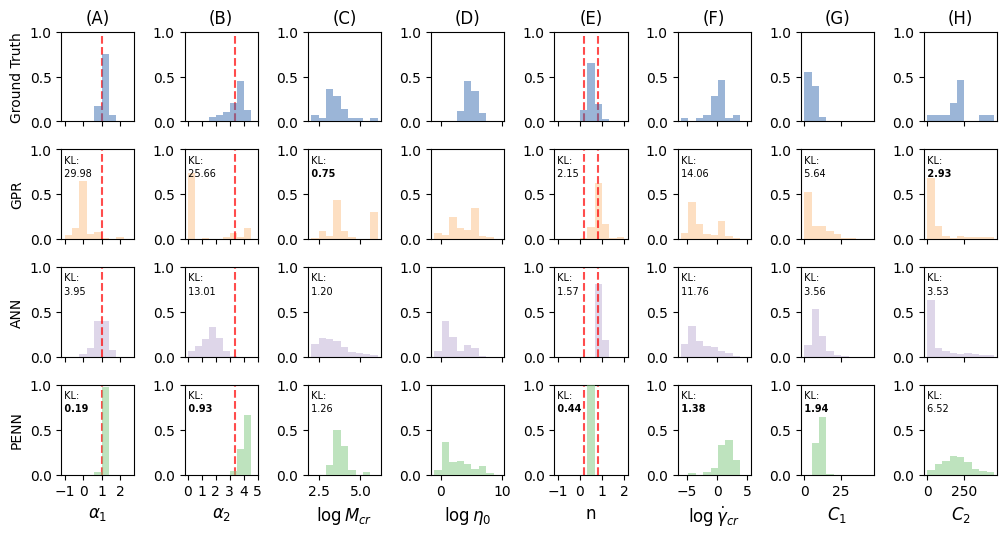

In [49]:
fig, ax = plt.subplots(4,8, figsize = (10,5), sharex='col')
ax_font = 10
bins = np.linspace(-5, 12, 15)
bins = 10
fig.tight_layout(pad = 1)
gpr_pos = 1
ann_pos = 2
penn_pos = 3
gt_pos = 0
div_mat = np.zeros((4,8))

colors = {'GPR':plt.get_cmap('Accent')(0.3), 'ANN': plt.get_cmap('Accent')(0.2), 'PIHN': plt.get_cmap('Accent')(0.1), 'Data': plt.get_cmap('Accent')(0.5)}
#titles
ax[gpr_pos,0].set_ylabel('GPR')#, rotation = 0)
ax[ann_pos,0].set_ylabel('ANN')#, rotation = 0)
ax[penn_pos,0].set_ylabel('PENN')#, rotation = 0)
ax[gt_pos,0].set_ylabel('Ground Truth')#, rotation = 0)

Ys = [r'$\alpha_1$', r'$\alpha_2$', r'$\logM_{cr}$', r'$\log\eta_0$', 'n',r'$\log\dot{\gamma}_{cr}$', r'$C_1$', r'$C_2$']
titles = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
for i in range(len(Ys)):
    #for n in range(4):
    ax[3, i].set_xlabel(Ys[i], fontsize = ax_font+2)
    ax[0, i].set_title(f'({titles[i]})')

print(np.ones_like(predicted_constants_gpr['a1'])/float(len(predicted_constants_gpr['a1'])))
        
#MW
bins_a1 = np.arange(-1, 3, 4/bins)
ys = [0]*4
y,_,gt_ps =ax[gt_pos,0].hist(Mw_data['a1'], bins = bins_a1, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'], density = True, stacked = True)
ys[gt_pos] = y
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))
y,_,ps =ax[gpr_pos,0].hist(predicted_constants_gpr['a1'], bins = bins_a1, alpha = 0.5 ,label = 'GPR', zorder = 1, color = colors['GPR'], density = True)

ys[gpr_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,0] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps = ax[ann_pos,0].hist(predicted_constants_ann['a1'], bins = bins_a1, alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'], density = True, stacked = True)

ys[ann_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,0] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])

y,_,ps =ax[penn_pos,0].hist(predicted_constants_HypNet['a1'], bins = bins_a1, alpha = 0.5 ,label = 'PENN', zorder = 3, color = colors['PIHN'], density = True, stacked = True)
ys[penn_pos] = y

for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,0] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps] )
print('a1 dist penn', [p.get_height() for p in ps])
print('a1 dist GT', [p.get_height() for p in gt_ps] )

# ax[1,0].plot([1, 1], [0, 160], '--', color = 'r')
# ax[1,0].tick_params(axis='both', which='major', labelsize=ax_font)
# ax[1,0].set_xticks([-4, -2,0, 2 ,4], fontsize = ax_font)
for i in [0,1,2,3]:
    ax[i,0].plot([1, 1], [0, 1], '--', color = 'r', alpha = 0.7)
    #ax[0,i].set_xlim([-1, 4])
    ax[i,0].set_xticks([-1, 0, 1, 2])


bins_a2 = np.arange(0, 5, 5/bins)
ys = [0]*4
y,_,gt_ps =ax[gt_pos,1].hist(Mw_data['a2'], bins = bins_a2, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'], density = True)
ys[gt_pos] = y
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))
y,_,ps =ax[gpr_pos,1].hist(predicted_constants_gpr['a2'], bins = bins_a2, alpha = 0.5 ,label = 'GPR', zorder =1, color = colors['GPR'], density = True)
ys[gpr_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,1] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[ann_pos,1].hist(predicted_constants_ann['a2'], bins = bins_a2, alpha = 0.5 ,label = 'ANN', zorder =2, color = colors['ANN'], density = True)
ys[ann_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,1] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[penn_pos,1].hist(predicted_constants_HypNet['a2'], bins = bins_a2, alpha = 0.5 ,label = 'HyperNetwork', zorder = 3, color = colors['PIHN'], density = True)
ys[penn_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,1] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])


for i in [0,1,2,3]:
    ax[i,1].plot([3.4, 3.4], [0, 1], '--', color = 'r', alpha = 0.7)
    # ax[i,1].plot([3.4, 3.4], [0, ys[i].max()], '--', color = 'r', alpha = 0.7)
    ax[i,1].set_xticks([0, 1, 2, 3,4 ,5])

bins_mcr = np.arange(2, 6.5, 4.5/bins)
y,_,gt_ps =ax[gt_pos,2].hist(Mw_data['Mcr'].dropna(), bins = bins_mcr, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'], density = True)
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))
y,_,ps =ax[ann_pos,2].hist(predicted_constants_ann['Mcr'], bins = bins_mcr, alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,2] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[gpr_pos,2].hist(predicted_constants_gpr['Mcr'], bins = bins_mcr, alpha = 0.5 ,label = 'GPR', zorder = 1, color = colors['GPR'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,2] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[penn_pos,2].hist(predicted_constants_HypNet['Mcr'].dropna(), bins = bins_mcr, alpha = 0.5 ,label = 'Hypernetwork', zorder = 3, color = colors['PIHN'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,2] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])


#ax[1,1].legend(fontsize = ax_font - 6)
# ax[1,1].set_xlabel(r'$M_{cr}$', fontsize = ax_font)
# ax[1,1].tick_params(axis='both', which='major', labelsize=ax_font)
# ax[1,1].legend(fontsize = 16, loc = 'lower right', bbox_to_anchor=(1, -.75), ncol = 4)

#SHEAR

bins_zs = np.arange(-1, 11, 12/bins)
#ax[0,1].hist([a[0] for a in predicted_constants_ann2['a2']], bins = bins, alpha = 0.5 ,label = 'ANN1')
y,_,gt_ps =ax[gt_pos,3].hist(np.log10(np.array(shear_data['z_shear']).tolist()), bins = bins_zs, alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'], density = True)
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))

y,_,ps =ax[gpr_pos,3].hist(np.log10(np.array(shear_predicted_constants_gpr['z_shear']).tolist()), bins = bins_zs, alpha = 0.5 ,label = 'GPR',zorder = 1, color = colors['GPR'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,3] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[ann_pos,3].hist(np.log10(np.array(shear_predicted_constants_ann['z_shear']).tolist()), bins = bins_zs, alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,3] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[penn_pos,3].hist([a.item() for a in shear_predicted_constants_HypNet['z_shear']], bins = bins_zs, alpha = 0.5 ,label = 'HypNet', zorder = 3, color = colors['PIHN'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,3] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])


#ax[0,1].set_xticks([-4, 0, 4, 8, 12], fontsize = ax_font)
#ax[0,1].tick_params(axis='both', which='major', labelsize=ax_font)

ys = [0]*4
bins_n = np.linspace(-1, 2, bins)
y,_,gt_ps =ax[gt_pos,4].hist(shear_data['n'], bins =bins_n , alpha = 0.5 ,label = 'Data', zorder = 4, color = colors['Data'], density = True)
ys[gt_pos] = y
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))

y,_,ps =ax[gpr_pos,4].hist(shear_predicted_constants_gpr['n'], bins = bins_n , alpha = 0.5 ,label = 'GPR', zorder = 1, color = colors['GPR'], density = True)
ys[gpr_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,4] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[ann_pos,4].hist(shear_predicted_constants_ann['n'], bins = bins_n , alpha = 0.5 ,label = 'ANN', zorder = 2, color = colors['ANN'], density = True)
ys[ann_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,4] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[penn_pos,4].hist([1-a for a in shear_predicted_constants_HypNet['n']], bins_n , alpha = 0.5 ,label = 'HypNet', zorder = 3, color = colors['PIHN'], density = True)
ys[penn_pos] = y
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,4] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])


#ax[1,0].plot([1, 1], [0, 160], '--', color = 'r')
#ax[1,0].legend(title = r'n')
for i in [0,1,2,3]:
    ax[i,4].plot([0.2, 0.2], [0, 1], '--', color = 'r', alpha = 0.7)
    ax[i,4].plot([0.8, 0.8], [0, 1], '--', color = 'r', alpha = 0.7)
    ax[i,4].set_xticks([-1, 0, 1, 2], fontsize = ax_font)
#ax[1,0].tick_params(axis='both', which='major', labelsize=ax_font)

Scr_bins = np.linspace(-6, 5, bins)
y,_,gt_ps =ax[gt_pos,5].hist(np.log10((np.array(shear_data['tau'])/np.array(shear_data['z_shear'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'Data', color = colors['Data'], density = True)
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))
y,_,ps =ax[ann_pos,5].hist(np.log10((np.array(shear_predicted_constants_ann['S_cr'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'ANN', color = colors['ANN'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,5] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])

y,_,ps = ax[gpr_pos,5].hist(np.log10((np.array(shear_predicted_constants_gpr['S_cr'])).tolist()), bins = Scr_bins, alpha = 0.5 ,label = 'GPR', color = colors['GPR'], density = True)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,5] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps = ax[penn_pos,5].hist(np.array([a.item() for a in shear_predicted_constants_HypNet['S_cr']]), bins = Scr_bins, alpha = 0.5 ,label = 'HypNet', color = colors['PIHN'], density = True)
#print('s_cr penn y', y)
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
#print('s_cr penn patches',[p.get_height() for p in ps])
div_mat[penn_pos,5] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])

#ax[2,1].set_xticks([-4, -2, 0, 2, 4], fontsize = ax_font)
#ax[2,1].set_xlabel(r'$\dot{\gamma}_c$ (1/s)', fontsize = ax_font)
#ax[1,1].tick_params(axis='both', which='major', labelsize=ax_font-2)

#ax[1,1].legend(title = r'$\dot{\gamma}_c$')


#TEMP
bins_c1 = np.arange(0, 50, 50/bins)
y,_,gt_ps =ax[gt_pos,6].hist(temp_data['C1'][temp_data['C1'] < 1000], bins = bins_c1, alpha = 0.5 ,label = 'Data', color = colors['Data'], density = True)#, color = colors['Data'])
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))
y,_,ps =ax[ann_pos,6].hist(wlf_constants_ann['C1'][abs(wlf_constants_ann['C1']) < 1000], bins = bins_c1, alpha = 0.5 ,label = 'ANN', color = colors['ANN'], density = True)#, color = colors['ANN'])
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,6] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
#ax[0,1].hist([a[0] for a in predicted_constants_ann2['a2']], bins = bins, alpha = 0.5 ,label = 'ANN1')
y,_,ps =ax[gpr_pos,6].hist(wlf_constants_gpr['C1'][abs(wlf_constants_gpr['C1']) < 1000], bins = bins_c1, alpha = 0.5 ,label = 'GPR', color = colors['GPR'], density = True)#, color = colors['GPR'])
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,6] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[penn_pos,6].hist([a for a in wlf_constants_HypNet['C1']], bins = bins_c1, alpha = 0.5 ,label = 'PIHN', color = colors['PIHN'], density = True)#, color = colors['PIHN'])
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,6] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])

#ax[0,1].plot([3.4, 3.4], [0, 90], '--', color = 'r')
#ax[1].set_xlabel(r'C1', fontsize = 16)
#ax[1].legend(title = r'C1')

bins_c2 = np.arange(0, 500, 500/bins)
y,_,gt_ps =ax[gt_pos,7].hist(temp_data['C2'][temp_data['C2'] < 1000], bins = bins_c2, alpha = 0.5 ,label = 'Data', color = colors['Data'], density = True)#, color = colors['Data'])
for patch in gt_ps:
    patch.set_height(patch.get_height() / sum(y))
y,_,ps =ax[ann_pos,7].hist(wlf_constants_ann['C2'][abs(wlf_constants_ann['C2']) < 1000], bins = bins_c2, alpha = 0.5 ,label = 'ANN', color = colors['ANN'], density = True)#, color = colors['ANN'])
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[ann_pos,7] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[gpr_pos,7].hist(wlf_constants_gpr['C2'][abs(wlf_constants_gpr['C2']) < 1000], bins = bins_c2, alpha = 0.5 ,label = 'GPR', color = colors['GPR'], density = True)#, color = colors['GPR'])
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[gpr_pos,7] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
print('gpr div',[p.get_height() for p in gt_ps], [p.get_height() for p in ps])
y,_,ps =ax[penn_pos,7].hist([a for a in wlf_constants_HypNet['C2']], bins = bins_c2, alpha = 0.5 ,label = 'PIHN', color = colors['PIHN'], density = True)#, color = colors['PIHN'])
for patch in ps:
    patch.set_height(patch.get_height() / sum(y))
div_mat[penn_pos,7] = divergence([p.get_height() for p in gt_ps], [p.get_height() for p in ps])
print('penn div',[p.get_height() for p in gt_ps], [p.get_height() for p in ps] )

#ax[0,1].plot([3.4, 3.4], [0, 90], '--', color = 'r')
#ax[2].set_xlabel(r'C2 (K)', fontsize = 16)
#ax[2].legend(fontsize = 14, loc = 'lower right', bbox_to_anchor=(1, -1), ncol = 4)

for i in [0,1,2,3]:
    for j in range(8):
        ax[i,j].set_ylim([0,1])
        ax[i,j].set_yticks([0,0.5, 1], fontsize = ax_font)
        if i>0 and j !=3 :
            domain = ax[i,j].get_xlim()[1] - ax[i,j].get_xlim()[0]
            kl_pos = ax[i,j].get_xlim()[0] + domain*0
            ax[i,j].text(kl_pos, 0.85, " KL:", fontsize = ax_font - 3)
            if div_mat[i,j] == np.min(div_mat[1:,j]):
                ax[i,j].text(kl_pos,0.7, f'{div_mat[i,j]: .2f}', fontsize = ax_font - 3, fontweight = 'bold')
            else:
                ax[i,j].text(kl_pos,0.7, f'{div_mat[i,j]: .2f}', fontsize = ax_font - 3)



plt.savefig('../../../data/ayush/Melt_Viscosity_Predictor/Paper_Fig/physics_analysis.svg', dpi = 300)




# Statistics

In [14]:
print('Mw a1 RMSE')
print('GPR', mse(np.ones_like(predicted_constants_gpr['a1']), predicted_constants_gpr['a1'], squared=False))
print('ANN', mse(np.ones_like(predicted_constants_ann['a1']), predicted_constants_ann['a1'], squared=False))
print('PENN', mse(np.ones_like(predicted_constants_HypNet['a1']), predicted_constants_HypNet['a1'], squared=False))

print('Mw a2 RMSE')
print('GPR', mse(np.ones_like(predicted_constants_gpr['a2'])*3.4, predicted_constants_gpr['a2'], squared=False))
print('ANN', mse(np.ones_like(predicted_constants_ann['a2'])*3.4, predicted_constants_ann['a2'], squared=False))
print('PENN', mse(np.ones_like(predicted_constants_HypNet['a2'])*3.4, predicted_constants_HypNet['a2'], squared=False))


print('Ground Truth')
print(Mw_data.mean())
print(shear_data.mean())
print(temp_data[temp_data['C2']<1e4].mean())


print('GPR')
print(predicted_constants_gpr.mean())
print(shear_predicted_constants_gpr.mean())
print(wlf_constants_gpr.mean())


print('ANN')
print(predicted_constants_ann.mean())
print(shear_predicted_constants_ann.mean())
print(wlf_constants_ann.mean())

print('PENN')
print(predicted_constants_HypNet.mean())
print(shear_predicted_constants_HypNet.mean())
print(wlf_constants_HypNet.mean())


Mw a1 RMSE
GPR 1.1641676062644606
ANN 0.3366180627374425
PENN 0.053921543
Mw a2 RMSE
GPR 2.879105919690198
ANN 1.898193145516517
PENN 0.6218911
Ground Truth
a1      1.063649
a2      3.438248
k1     -4.747398
k2    -10.378739
Mcr     3.462746
dtype: float64
z_shear    6.051987e+05
n         -3.695300e+00
tau        1.101992e+07
dtype: float64
C1, C2, Tr            NaN
Sample        3781.761905
C1               4.827571
C2             314.022762
Tr              87.238566
dtype: float64
GPR
a1     5.855884e-02
a2     1.231447e+00
k1     3.366990e+00
k2    -7.740278e-01
Mcr    4.291657e+00
r2    -3.589062e+13
dtype: float64
z_shear    2.146329e+11
n          3.021960e+06
S_cr      -8.243401e+07
r2         7.755318e-01
dtype: float64
C1        9.304446
C2      158.431653
Tr      227.922011
r2   -14610.909381
r        40.000000
dtype: float64
ANN
a1     0.964372
a2     1.626635
k1    -1.932799
k2    -3.903179
Mcr    3.254211
r2     0.984257
dtype: float64
z_shear    103360.720778
n          

/tmp/ipykernel_403196/52908969.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(Mw_data.mean())
/tmp/ipykernel_403196/52908969.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(shear_data.mean())
/tmp/ipykernel_403196/52908969.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(predicted_constants_gpr.mean())
/tmp/ipykernel_403196/52908969.py:20: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a 

In [12]:
shear_const['PIM'].loc[[],:]

,Sample,z_shear,n,S_cr,r2


In [13]:
corr = pd.DataFrame(columns = ['gpr', 'ann', 'HypNet'], index = ['Mw', 'T', 'Shear'])
for i in corr.columns:
    corr.loc['Shear', i] = f"{locals()['shear_predicted_constants_' + i].loc[locals()['shear_predicted_constants_' + i]['r2']>-5, 'r2'].mean()} +/- {locals()['shear_predicted_constants_' + i]['r2'].std()}"
    corr.loc['Mw', i] = f"{locals()['predicted_constants_' + i].loc[locals()['predicted_constants_' + i]['r2']>-5, 'r2'].mean()} +/- {locals()['predicted_constants_' + i]['r2'].std()}"
    corr.loc['T', i] = f"{locals()['wlf_constants_' + i].loc[locals()['wlf_constants_' + i]['r2']>-5, 'r2'].mean()} +/- {locals()['wlf_constants_' + i]['r2'].std()}"
    if i == 'HypNet':
        corr.loc['T', i] = f"{locals()['wlf_constants_' + i].loc[locals()['wlf_constants_' + i]['r2_fit']>-5, 'r2_fit'].mean()} +/- {locals()['wlf_constants_' + i]['r2_fit'].std()}"



In [14]:
corr.rename(columns={'HypNet': 'PIHN'})

,gpr,ann,PIHN
Mw,0.8901651985405383 +/- 395728359052622.25,0.984257418790569 +/- 0.05773138682764861,0.9977913383642679 +/- 0.006400602097381933
T,0.8855118229971721 +/- 561924.946726825,0.5187932540125194 +/- 0.2871919981763936,0.814827692064565 +/- 1925.0218223159732
Shear,0.7755318015556638 +/- 0.29669893817474563,0.3825128139817988 +/- 0.33073166797480064,0.9919892941832651 +/- 0.023182468633980376


In [15]:
shear_predicted_constants_HypNet.loc[shear_predicted_constants_HypNet['r2'] < 0.9,:]

,Sample,z_shear,n,S_cr,r2
52,polytriethyleneglycolaltdecanedioicacid at 43....,[0.7491637],0.506045,[2.4273763],0.643285
100,"polydimethylsiloxane at 23.0 C, Mw = 172999",[2.3365407],0.499841,[2.6307049],0.886155


In [16]:
T_scaler = joblib.load('MODELS/2022-09-14_full_aug_mod/scalers/T_scaler.save')
y_scaler = joblib.load('MODELS/2022-09-14_full_aug_mod/scalers/y_scaler.save')

FileNotFoundError: [Errno 2] No such file or directory: 'MODELS/2022-09-14_full_aug_mod/scalers/T_scaler.save'

In [17]:
T_scaler.data_min_, T_scaler.data_max_

NameError: name 'T_scaler' is not defined

Tr_unsc [[0.3161835]] Tr_y 0.31700033 C1_unsc [[0.42814532]] C2_unsc [[0.7068512]]
(40,) [0.76437494 0.75079747 0.73729726 0.72387365 0.71052598 0.69725362
 0.68405593 0.67093229 0.65788206 0.64490464 0.63199942 0.61916579
 0.60640317 0.59371097 0.5810886  0.56853549 0.55605107 0.54363478
 0.53128607 0.51900437 0.50678916 0.49463989 0.48255602 0.47053704
 0.45858241 0.44669163 0.43486418 0.42309957 0.41139728 0.39975683
 0.38817773 0.37665949 0.36520164 0.3538037  0.3424652  0.33118568
 0.31996468 0.30880175 0.29769643 0.28664828]
(40,) [0.7217798  0.55546933 0.67958575 0.6866171  0.6033352  0.59917724
 0.60327864 0.4903268  0.5524353  0.5507303  0.51215464 0.49079338
 0.5499509  0.4181918  0.4439935  0.55899936 0.54       0.48244736
 0.46517134 0.3832618  0.39736164 0.41962934 0.45354503 0.38093194
 0.26567236 0.41360015 0.41405967 0.35820296 0.4107208  0.3201777
 0.23933683 0.22808121 0.29969743 0.15248203 0.24279991 0.3663328
 0.23716147 0.15806256 0.15952732 0.21153902]
Tr [[90.149734]] Tr_y [[2.3562357]] C1 [[4.004844]] C1_adj [[6.35065981]] C2 [[268.60345459]]
Tr_fit 200.00000000004334 Tr_y_fit 6.328579763306446 C1_fit 12.379879032738007 C2_fit 299.99994217388235
r2 0.4834598165234547 0.8561099943788573

In [18]:
test_pred = [0.7217798 , 0.55546933, 0.67958575, 0.6866171,  0.6033352 , 0.59917724,
 0.60327864, 0.4903268 , 0.5524353 , 0.5507303 , 0.51215464, 0.49079338,
 0.5499509 , 0.4181918 , 0.4439935,  0.55899936, 0.54      , 0.48244736,
 0.46517134 ,0.3832618 , 0.39736164 ,0.41962934, 0.45354503, 0.38093194]
print(len(test_pred))
temps = np.arange(195,201, .25)


24


In [19]:
plt.hist([a[0][0] for a in wlf_constants_HypNet['C2']], bins = 10)

TypeError: 'float' object is not subscriptable

NameError: name 'y_scaler' is not defined

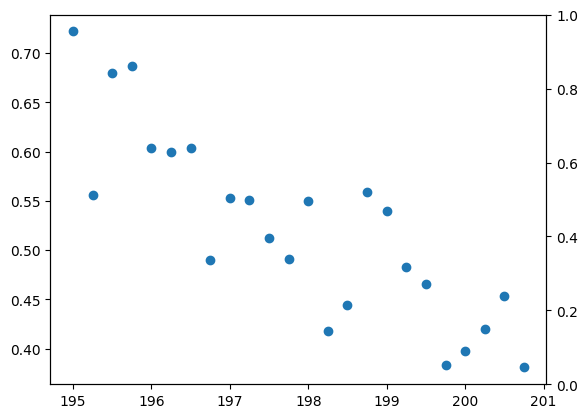

In [20]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.scatter(temps,test_pred)
ax2.scatter(temps,y_scaler.transform(np.array(test_pred).reshape(-1,1)), marker = '*', color = 'r')
ax1.plot(temps, WLF_obj(temps,90.14, 6.0, 238.60, 2.356), color = 'g')
ax2.plot(temps, WLF_obj(T_scaler.transform(temps.reshape(-1,1)),0.3161835, 0.42814532, 0.7068512, 0.31700033), color ='r')
unsc_const_fit = y_scaler.inverse_transform(WLF_obj(T_scaler.transform(temps.reshape(-1,1)),0.3161835, 0.42814532, 0.7068512, 0.31700033))
ax1.plot(temps, unsc_const_fit)


In [21]:
r2_score(test_pred,unsc_const_fit)

NameError: name 'unsc_const_fit' is not defined

In [22]:
T_scaler.inverse_transform([[0.7068]])/2

NameError: name 'T_scaler' is not defined

In [23]:
Tr_unsc = 0.318
C1_unsc = 0.435
C2_unsc = 0.703

In [7]:
T_scaler.inverse_transform(np.array([Tr_unsc, C1_unsc, C2_unsc]).reshape(-1,1))

array([[ 90.84],
       [135.3 ],
       [237.14]])

In [8]:
T_p = T_scaler.transform([[100]]) - T_scaler.transform([[50]])

In [9]:
T_scaler.inverse_transform(0.70 +T_p)

array([[286.]])